In [1]:
import numpy as np
import pywt
import matplotlib.pyplot as plt

In [2]:
wavelet = pywt.Wavelet('db2')
print(wavelet)

Wavelet db2
  Family name:    Daubechies
  Short name:     db
  Filters length: 4
  Orthogonal:     True
  Biorthogonal:   True
  Symmetry:       asymmetric
  DWT:            True
  CWT:            False


In [3]:
print(wavelet.dec_lo, wavelet.dec_hi)

[-0.12940952255126037, 0.2241438680420134, 0.8365163037378079, 0.48296291314453416] [-0.48296291314453416, 0.8365163037378079, -0.2241438680420134, -0.12940952255126037]


In [4]:
print(wavelet.rec_lo, wavelet.rec_hi)

[0.48296291314453416, 0.8365163037378079, 0.2241438680420134, -0.12940952255126037] [-0.12940952255126037, -0.2241438680420134, 0.8365163037378079, -0.48296291314453416]


In [10]:
Rnum = 4000
x = np.linspace(0.0,1.0,num=512)
dx = 1.0/np.shape(x)[0]
tsteps = np.linspace(0.0,2.0,num=400)
dt = 2.0/np.shape(tsteps)[0]

def exact_solution(Rnum,t):
    t0 = np.exp(Rnum/8.0)

    return (x/(t+1))/(1.0+np.sqrt((t+1)/t0)*np.exp(Rnum*(x*x)/(4.0*t+4)))

def collect_snapshots(Rnum):
    snapshot_matrix = np.zeros(shape=(np.shape(x)[0],np.shape(tsteps)[0]))

    trange = np.arange(np.shape(tsteps)[0])
    for t in trange:
        snapshot_matrix[:,t] = exact_solution(Rnum,tsteps[t])[:]

    return np.transpose(snapshot_matrix)

/home/rmlans/anaconda3/envs/deephyper_env/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.


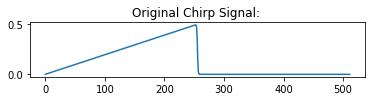

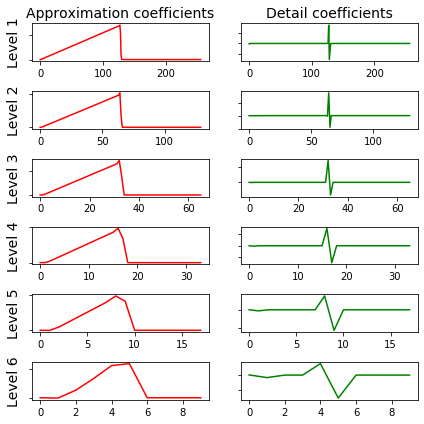

In [20]:
chirp_signal = exact_solution(Rnum,0.0)

fig, ax = plt.subplots(figsize=(6,1))
ax.set_title("Original Chirp Signal: ")
ax.plot(chirp_signal)
plt.show()
    
data = chirp_signal
waveletname = 'db2'
num_levels = 6
 
fig, axarr = plt.subplots(nrows=num_levels, ncols=2, figsize=(6,6))
data_list = []
coeff_list = []

for ii in range(num_levels):
    (data, coeff_d) = pywt.dwt(data, waveletname)
    data_list.append(data)
    coeff_list.append(coeff_d)
    axarr[ii, 0].plot(data, 'r')
    axarr[ii, 1].plot(coeff_d, 'g')
    axarr[ii, 0].set_ylabel("Level {}".format(ii + 1), fontsize=14, rotation=90)
    axarr[ii, 0].set_yticklabels([])
    if ii == 0:
        axarr[ii, 0].set_title("Approximation coefficients", fontsize=14)
        axarr[ii, 1].set_title("Detail coefficients", fontsize=14)
    axarr[ii, 1].set_yticklabels([])
plt.tight_layout()
plt.show()

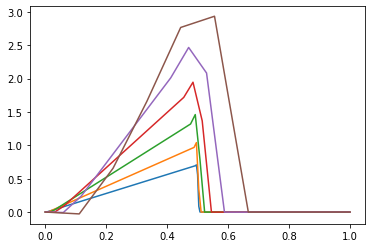

In [33]:
for i in range(num_levels):
    plt.plot(np.linspace(0,1.0,len(data_list[i])),data_list[i])

Number of coefficients - no loss: 525
Number of datapoints: 512
Number of coefficients retained: 20
Number of datapoints reconstructed: 18
Compression ratio: 26.25


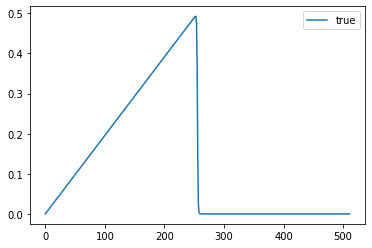

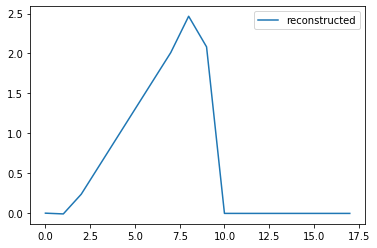

In [18]:
coeffs = pywt.wavedec(chirp_signal, 'db2', level=6)
reconstructed_signal = pywt.waverec(coeffs, 'db2')

num_coeffs = 0
for i in range(len(coeffs)):
    num_coeffs = num_coeffs + np.shape(coeffs[i])[0]

compressed_coeffs = []
num_coeffs_retained = 0

for i in range(2):
    compressed_coeffs.append(coeffs[i])
    num_coeffs_retained = num_coeffs_retained + np.shape(coeffs[i])[0]

    
reconstructed_signal = pywt.waverec(compressed_coeffs, 'db2')


print('Number of coefficients - no loss:',num_coeffs)
print('Number of datapoints:',np.shape(chirp_signal)[0])

print('Number of coefficients retained:',num_coeffs_retained)
print('Number of datapoints reconstructed:',np.shape(reconstructed_signal)[0])

print('Compression ratio:',num_coeffs/num_coeffs_retained)


plt.plot(chirp_signal,label='true')
plt.legend()
plt.show()

plt.plot(reconstructed_signal,label='reconstructed')
plt.legend()
plt.show()